# Redes Neuronales de Una Capa

Es momento de complicar el funcionamiento de las neuronas. Para ello empezaremos a apilar diferentes neuronas, a esta agrupamiento de neuronas es a lo que se le conoce como capas profundas.

Primeramente se apilará en una sola capa, con el fin de comprender el funcionamiento de esta red, para luego complejizarlo y colocar más de una capa, que es cuando las redes neuronales tienen un gran poder de aplicación a distintos problemas. La finalidad de estas neuronas sigue siendo la misma, resolver problemas de regresión y calsificación.

Una forma de entender el funcionamiento de estas neuronas es, primeramente, cambiando los grafos que teniamos en un inicio. El siguiente diagrama es la representación de una red neuronal de una capa. ¿Qué tiene de distinto con lo que ya habiamos visto anteriormente? La diferencia radica en que cada circulo representa combinación lineal del vector de caracteristicas y los pesos sinápticos y, la función de activación.

Un ejemplo de la forma de estas neuronas es la siguiente:
![Imagen](https://interactivechaos.com/sites/default/files/2020-11/tutdl_0119.jpg)

De esta manera podemos ampliar el poder de nuestras neuronas, por ejemplo, en el caso de la clasificación, si solo tuvieramos una neurona de salida con una función de activación logistica, esta nos diria si una clase pertenece o no a un conjunto de clases; sin embargo, en el caso de que tengamos más de dos clases, una sola neurona de salida ne seria suficiene para poder clasificar correctamente. Es ahi cuando este tipo de neuronas cobran mucha importancia en los problemas del Machine Learning.


Generalizando las dimensiones de nuestros datos, estos continuan siendo las mismas, con algunas leves adiciones. El vector de caracteristicas o vector de entradas es tamaño $n$, es decir $x \in \mathbb{R}^n$, los pesos  sinápticos comparten la misma dimensión del vector de caracteristicas, $w \in \mathbb{R}^n$ y, el sesgo es de tamaño $b \in \mathbb{R}$.

Como queremos realizar el producto punto de $x$ y $w$, debemos expandir esta notación al caso de multiples neuronas, realizando el mapeo de $\mathbb{R}^n \rightarrow \mathbb{R}^m$. Es decir la matriz de entrada sigue siendo un vector de $n$ dimensiones, $x \in \mathbb{R}^n$; la salida es un vector de $m$ dimensiones, $\hat{y} \in \mathbb{R}^m$, el sesgo es un vector de $m$ dimensiones, $b \in \mathbb{R}^m$ y, tenemos una matriz de pesos sinápticos de la forna, $w \in \mathbb{R}^{m \times n}$.

Por lo tanto, para propagar esta red neuronal sera similar a lo que ya conocemos:
\begin{align}
z = w x + b\\
\hat{y} = \varphi (z) \\
\end{align}
Donde $z$ es un vector de tamaño $m$, y la función de activación se aplicará elemento a elemento de este último vector.


# Entrenamiento

Como se observó anteriormente, el entrenamiento depende de la función de costo y la función de activación. De forma general usaremos el error cuadrático medio:

$$L(y, \hat{y}) = \frac{1}{2p} \sum_{i=1}^p||y^{(i)} - \hat{y}^{(i)}||^2_2$$

En este caso, tanto $y^{(i)}$ como $\hat{y}^{(i)}$ son vectores de tamaño $m$, aplicando gradiente descendente nos llevará a las mismas reglas ya conocidas.

El algoritmo de optimización es:

\begin{align}
w - η ∇_w L(y,\hat{y}) \rightarrow w \\
b - η \frac{∂}{∂ b}  L(y,\hat{y}) \rightarrow b \\
\end{align}

Y las ecuaciones de actualización serán:

\begin{align}
w + \frac{η}{p} \left[\left(Y-\hat{Y}\right) \odot \left(\frac{d\hat{Y}}{dZ}\right)\right] X^T \rightarrow w \\
b + \frac{η}{p} \sum \left[\left(Y-\hat{Y}\right) \odot \left(\frac{d\hat{Y}}{dZ}\right)\right] \rightarrow b \\
\end{align}

Con algunas consideraciones a tomar, pues ya no serán vectores como anteriormente. Tanto $Y$ como $\hat{Y}$ son matrices de tamaño $m \times p$, la derivada con respecto a $Z$ es de $m \times p$, la matriz transpuesta es de tamaño $p \times n$, y la matriz $w$ es de tamaño $m \times n$.

# SoftMax

Para clasificación multiclase, necesitamos otra función de activación. Para esto se utiliza la función de activación SoftMax, que se encarga de tomar las probabilidades de cada neurona y con base en esas probabilidaes decidiremos si una clase pertenece o no a un conjunto de clases

![Imagen](https://www.researchgate.net/profile/Pengwei-Yang/publication/370277982/figure/fig2/AS:11431281153635439@1682516124753/Softmax-function-in-MLP-7.ppm)

Dicho de otro modo, a la salida que obtengamos de cada neurona, $z_j$, debemos aplicar dicha función para asi obtener las probabilidades deseadas:

$$S(z)_j = \frac{e^{z_j}}{\sum_{i-1}^{m} e^{z_j}}$$

Esto nos dará las probabilidades normalizadas.

Un problema con esta función de activación al momento de programarla, es que, el número de euler al estar elevado a grandes números puede provocar un desbordamiento de bits. Para solucionar este problema nos valdremos de algunos trucos matemáticos. La nueva función de activación queda:

$$S(z)_j = \frac{e^{z_j + D}}{\sum_{i-1}^{m} e^{z_j + D}}$$

Donde $D=- \max \left\{z_1, z_2, ..., z_m \right\}$. Con esto ya tendremos un algoritmo estable.

Sin ambargo, para usar esta función debemos usar unas funciones de costo particulares para no tener una regla de adaptación no tan compleja. Esta función de costo es el error de entropia cruzada categorica (para el caso logístico usamos la entropia cruzada binaria).

Para el caso del error en linea nuestra función de costo es:

$$E = - \sum_{j=1}^{m} y_i \log (\hat{y}_i)$$

Y para el caso del entrenamiento en lotes:

$$E = - \frac{1}{p} \sum_{i=1}^{p} \sum_{j=1}^{m} y_{j}^{(i)} \log (\hat{y}_{j}^{(i)})$$




# Programando

In [21]:
import numpy as np

In [26]:
#Creamos las funciones de activacion con su derivada
def linear(z, derivative=False):
    a = z
    #Calculamos la derivada de la funcion lineal
    if derivative:
        da = np.ones(z.shape) #vector de unos de las misma forma que z
        return a, da
    return a


def sigmoid(z, derivative=False):
    a = 1 / (1 + np.exp(-z))
    if derivative:
        da = a * (1 - a) #Sera producto elemento a alemento de un dos vectores
        return a, da
    return a

def softmax(z, derivative=False):
    e = np.exp(z - np.max(z, axis=0))
    a = e / np.sum(e, axis=0)
    if derivative:
        da = np.ones(z.shape)
        return a, da
    return a


#Creando la Clase
class OneLayerNeural:
    #Red neuronal de una capa
    #Necesitamos el número de entradas y salidas (n,m) para inicializar
    def __init__(self, n_inputs, n_outputs, activation_function, learning_rate=0.1):
        self.w = -1 + 2*np.random.rand(n_outputs, n_inputs)
        self.b = -1 + 2*np.random.rand(n_outputs, 1) #mandamos un 1 para que sea un vector columna
        self.f = activation_function
        self.eta = learning_rate

    #Prediccion
    def predict(self, X):
        Z = np.dot(self.w, X) + self.b
        return self.f(Z)

    #Entrenamiento
    def fit(self, X, Y, epochs=200):
        p = X.shape[1] #numero de patrones (columnas)
        for _ in range(epochs):
            Z = np.dot(self.w, X) + self.b
            Yest, dY = self.f(Z, derivative=True)
            lg = (Y - Yest) * dY #Gradiente local
            self.w += (self.eta/p) * np.dot(lg, X.T) #No aplicamos la regularizacion
            self.b += (self.eta/p) * np.sum(lg, axis=1).reshape(-1,1) #axis=1 para sumar las columnas de cada fila y convertimos el vector a dos dimensiones


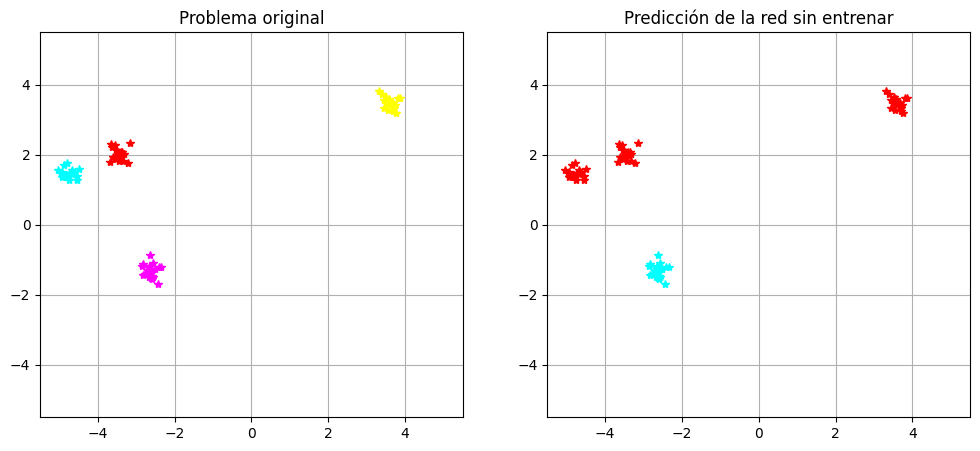

In [48]:
#Ejemplos
minx = -5
maxx = 5

classes = 4
p_c = 20
X = np.zeros((2, classes * p_c))
Y = np.zeros((classes, classes * p_c))

for i in range(classes):
    seed=minx + (maxx-minx) * np.random.rand(2,1)
    X[:, i*p_c:(i+1)*p_c] = seed + 0.15 * np.random.randn(2,p_c)
    Y[i, i*p_c:(i+1)*p_c] = np.ones((1,p_c))

#Problema sin entrenamiento
net = OneLayerNeural(2, classes, softmax)
#net.fit(X, Y, epochs=200)
Ypred = net.predict(X)

#Graficamos
import matplotlib.pyplot as plt

cm=[[1,1,0],[1,0,1],[0,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,1],[0,0,0]]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1 - Problema original
y_c = np.argmax(Y, axis=0)
for i in range(X.shape[1]):
    ax1.plot(X[0,i], X[1,i], '*', c=cm[y_c[i]])
ax1.axis([-5.5,5.5,-5.5,5.5])
ax1.set_title('Problema original')
ax1.grid()
# Gráfico 2 - Predicción de la red
y_c = np.argmax(Ypred, axis=0)
for i in range(X.shape[1]):
    ax2.plot(X[0,i], X[1,i], '*', c=cm[y_c[i]])
ax2.axis([-5.5,5.5,-5.5,5.5])
ax2.set_title('Predicción de la red sin entrenar')
ax2.grid()

plt.show()

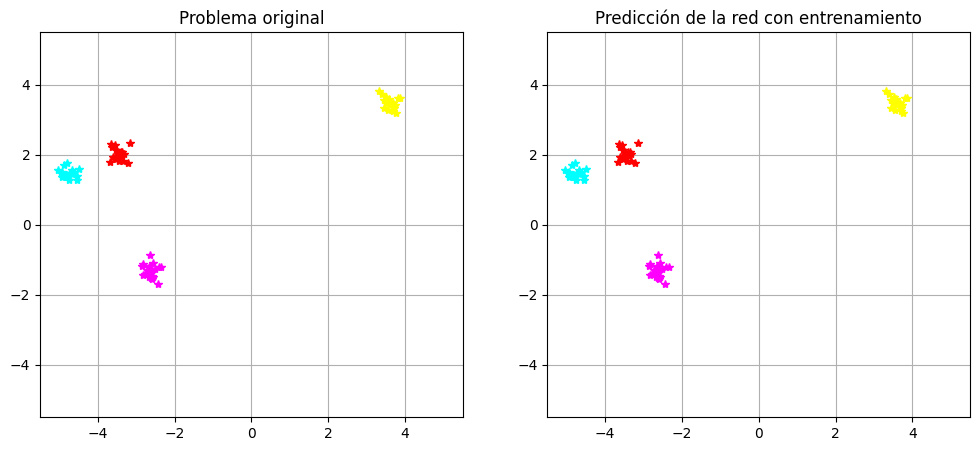

In [49]:
#Problema con entrenamiento
net = OneLayerNeural(2, classes, softmax)
net.fit(X, Y, epochs=200)
Ypred = net.predict(X)

#Grafico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1 - Problema original
y_c = np.argmax(Y, axis=0)
for i in range(X.shape[1]):
    ax1.plot(X[0,i], X[1,i], '*', c=cm[y_c[i]])
ax1.axis([-5.5,5.5,-5.5,5.5])
ax1.set_title('Problema original')
ax1.grid()
# Gráfico 2 - Predicción de la red
y_c = np.argmax(Ypred, axis=0)
for i in range(X.shape[1]):
    ax2.plot(X[0,i], X[1,i], '*', c=cm[y_c[i]])
ax2.axis([-5.5,5.5,-5.5,5.5])
ax2.set_title('Predicción de la red con entrenamiento')
ax2.grid()

plt.show()